In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/busebahadir/Desktop/A:B Testing/digital_marketing_dataset.csv')

A/B Testing: Bootstrapping 
Definiton of Method


We'll use bootstrapping for A/B testing. The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable. This information retrieved from Wikipedia.

Testing Steps:

1. Creating 1000 samples of dataset (bootstraping)
2. Calculating SignUp, Download, Form Submission and Purchase rates for A/B groups
3. Plotting the bootstrap distributions
4. Calculating the differences between the two A/B groups
5. Calculating the probability that turnover rates are greater for the control group
6. Evaluating results and making recommendation

In [8]:
# Creating an list with bootstrapped means for each A/B group

boot_signup = []
boot_downloads = []
boot_form = []
boot_purchase = []

for i in range(1000):
    
    boot_mean_signup = data.sample(frac=1, replace=True).groupby('Group')['SignUps'].mean()
    boot_mean_downloads = data.sample(frac=1, replace=True).groupby('Group')['Downloads'].mean()
    boot_mean_form = data.sample(frac=1, replace=True).groupby('Group')['FormSubmissions'].mean()
    boot_mean_purchase = data.sample(frac=1, replace=True).groupby('Group')['Purchases'].mean()
    
    boot_signup.append(boot_mean_signup)
    boot_downloads.append(boot_mean_downloads)
    boot_form.append(boot_mean_form)
    boot_purchase.append(boot_mean_purchase)

In [9]:
# Transforming the list to a DataFrame

boot_signup = pd.DataFrame(boot_signup)
boot_downloads = pd.DataFrame(boot_downloads)
boot_form = pd.DataFrame(boot_form)
boot_purchase = pd.DataFrame(boot_purchase)

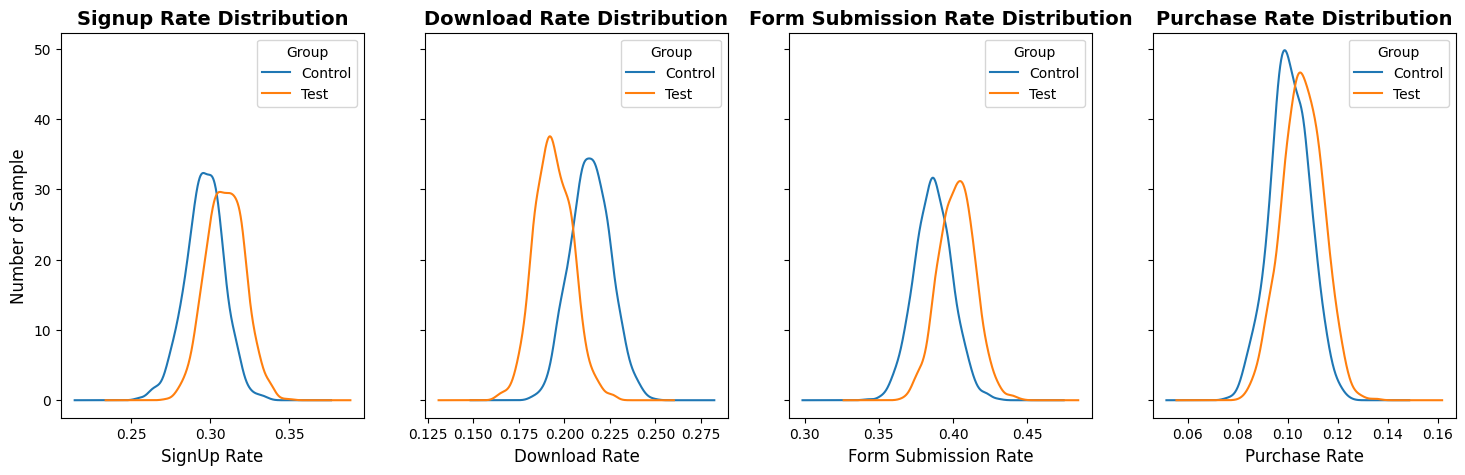

In [11]:
# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(18, 5))

boot_signup.plot.kde(ax=ax1)
ax1.set_xlabel("SignUp Rate", size=12)
ax1.set_ylabel("Number of Sample", size=12)
ax1.set_title("Signup Rate Distribution", fontweight="bold", size=14)

boot_downloads.plot.kde(ax=ax2)
ax2.set_xlabel("Download Rate", size=12)
ax2.set_ylabel("Number of Sample", size=12)
ax2.set_title("Download Rate Distribution", fontweight="bold", size=14)

boot_form.plot.kde(ax=ax3)
ax3.set_xlabel("Form Submission Rate", size=12)
ax3.set_ylabel("Number of Sample", size=12)
ax3.set_title("Form Submission Rate Distribution", fontweight="bold", size=14)

boot_purchase.plot.kde(ax=ax4)
ax4.set_xlabel("Purchase Rate", size=12)
ax4.set_ylabel("Number of Sample", size=12)
ax4.set_title("Purchase Rate Distribution", fontweight="bold", size=14)

plt.show()

These four distributions above represent the bootstrap uncertainty over what the underlying turnover rates could be for the two A/B groups. Just skimming these plots, we can see that there seems to be some evidence of a difference, albeit small. Let's zoom in on the differences.

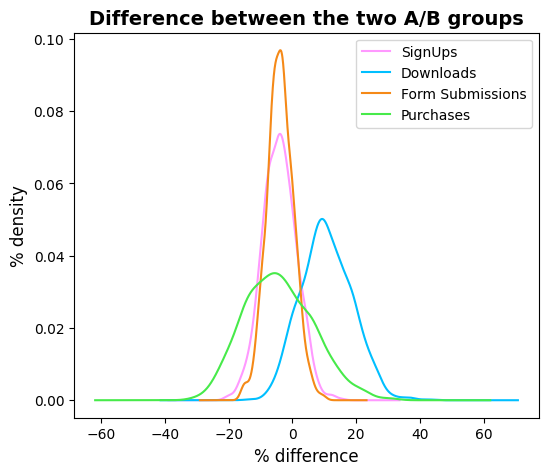

In [12]:
boot_signup['diff'] = ((boot_signup['Control'] - boot_signup['Test']) / boot_signup['Test'] * 100)
boot_downloads['diff'] = ((boot_downloads['Control'] - boot_downloads['Test']) / boot_downloads['Test'] * 100)
boot_form['diff'] = ((boot_form['Control'] - boot_form['Test']) / boot_form['Test'] * 100)
boot_purchase['diff'] = ((boot_purchase['Control'] - boot_purchase['Test']) / boot_purchase['Test'] * 100)

fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_signup['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "SignUps")
boot_downloads['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "Downloads")
boot_form['diff'].plot.kde(ax=ax1, c= "#F58917", label = "Form Submissions")
boot_purchase['diff'].plot.kde(ax=ax1, c= "#47EA4A", label = "Purchases")

ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

From these charts, we can see that the most likely % difference is around 12% - 13% for Downloads. For SignUps and Form Submissions the most likely % difference is around -2%. Lastly, for Purchases it's around -7%. Moreover, the most of the distribution is below 0%, in favor of CTA Button B and Schema 2, except for Downloads. But what is the probability that the difference is below 0%? Let's calculate that as well.

In [13]:
prob_signup = (boot_signup['diff']>0).sum()/len(boot_signup['diff'])
prob_downloads = (boot_downloads['diff']>0).sum()/len(boot_downloads['diff'])

prob_form = (boot_form['diff']>0).sum()/len(boot_form['diff'])
prob_purchase = (boot_purchase['diff']>0).sum()/len(boot_purchase['diff'])

print(f"\nThe probability of 'SignUp' is greater for the Control group: {round(prob_signup,2)*100}% "
      f"\nThe probability of 'Download' is greater for the Control group: {round(prob_downloads, 2)*100}% "
      f"\nThe probability of 'Form Submission' is greater for the Control group: {round(prob_form, 2)*100}%"
      f"\nThe probability of 'Purchase' is greater for the control Croup: {round(prob_purchase, 2)*100}%")



The probability of signing up is greater for the control group: 22.0% 
The probability of downloading is greater for the control group: 90.0% 
The probability of form submission is greater for the control group: 18.0%
The probability of purchase is greater for the control group: 34.0%


The bootstrap result tells us that there is strong evidence 90% probability that Download rate is lower when Button B and Schema 2 is demonstrated to users instead of Button A and Schema 1. The other results don't seem significant.
If we assume Download is the most important KPI, it should be decided that CTA Button A and Schema 1 should be kept.